In [30]:

from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
import re
import plotly.express as px


In [23]:

taxes = pd.read_csv(config.EXTRACTION_FILE)
taxes = taxes.dropna(subset=['adresse','revenu_fiscal_de_ref'])
taxes['revenu_fiscal_de_ref'] = taxes['revenu_fiscal_de_ref'].astype('int64')
taxes['nb_parts'] = taxes['nb_parts'].astype('float')

In [31]:
# Répartition géographique des déclarants
geolocator = Nominatim(user_agent="my_user_agent")

taxes['postal_code'] = taxes['adresse'].apply(
    lambda x:re.search(r'[0-9]{5}',x).group(0) if x != "" else "")

taxes['localisation'] = taxes['postal_code'].apply(
    lambda x:(geolocator.geocode(x+' France').latitude,
    geolocator.geocode(x+' France').longitude) if geolocator.geocode(x+' France') else ())


### Répartition géographique des déclarants

In [47]:
count_per_area = taxes.groupby(['postal_code','localisation']).agg('count').reset_index()


In [49]:
lat=np.array([tx[0] for tx in count_per_area['localisation']])
lon=np.array([tx[1] for tx in count_per_area['localisation']])

fig = px.scatter_geo(count_per_area,lat=lat,lon=lon, hover_name="postal_code",color='postal_code',size='nom')
fig.update_layout(title = 'World map', title_x=0.5)
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['03100'], dtype=object),
              'lat': array([46.34392097]),
              'legendgroup': '03100',
              'lon': array([2.59412756]),
              'marker': {'color': '#636efa', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '03100',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['06200'], dtype=object),
              'lat': array([43.67991951]),
              'legendgroup': '06200',
              'lon': array([7.21034937]),
              'marker': {'color': '#EF553B', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '06200',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['12000'], dtype=object),
              'lat': array([44.35336937]),
              'legendgroup': '12000',
              'lon': array([2.57210811]),
              'marker': {'color': '#00cc96', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '12000',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['17100'], dtype=object),
              'lat': array([45.74908525]),
              'legendgroup': '17100',
              'lon': array([-0.62578625]),
              'marker': {'color': '#ab63fa', 'size': array([2]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '17100',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['21000'], dtype=object),
              'lat': array([47.32602162]),
              'legendgroup': '21000',
              'lon': array([5.04486234]),
              'marker': {'color': '#FFA15A', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '21000',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['23000'], dtype=object),
              'lat': array([46.16948466]),
              'legendgroup': '23000',
              'lon': array([1.87385974]),
              'marker': {'color': '#19d3f3', 'size': array([1]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '23000',
              'showlegend': True,
              'type': 'scattergeo'},
             {'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>pos' ... '}<br>lon=%{lon}<extra></extra>'),
              'hovertext': array(['42300'], dtype=object),
              'lat': array([46.03398703]),
              'legendgroup': '42300',
              'lon': array([4.06130756]),
              'marker': {'color': '#FF6692', 'size': array([2]), 'sizemode': 'area', 'sizeref': 0.005, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '42300',
              'showlegend': True,
              't

## Revenu fiscal de référence

In [34]:
print(" Valeur Moyenne :{}".format(taxes['revenu_fiscal_de_ref'].mean()))
print(" Valeur Max :{}".format(taxes['revenu_fiscal_de_ref'].max()))
print(" Valeur Min :{}".format(taxes['revenu_fiscal_de_ref'].min()))


 Valeur Moyenne :53274.41860465116
 Valeur Max :98389
 Valeur Min :4362


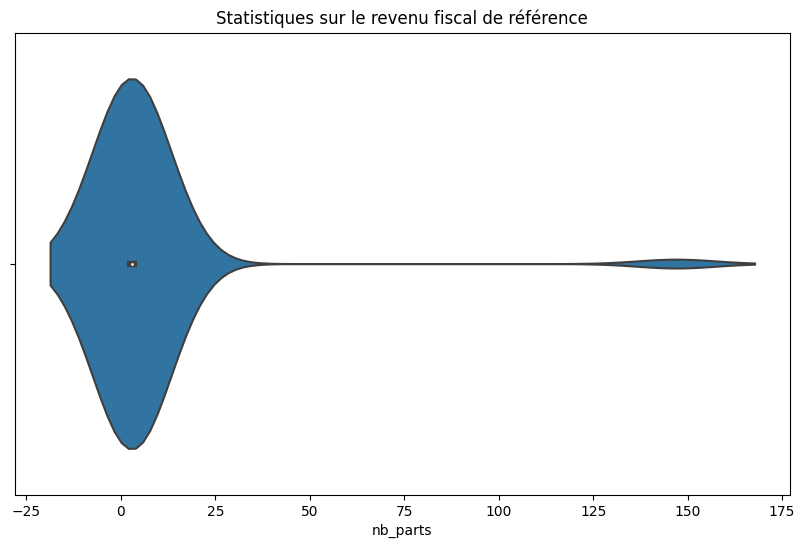

In [36]:
plt.figure(figsize=(10,6))
sns.violinplot(data=taxes,x='nb_parts')
plt.title("Statistiques sur le revenu fiscal de référence")
plt.show()

/tmp/ipykernel_25097/2160336726.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



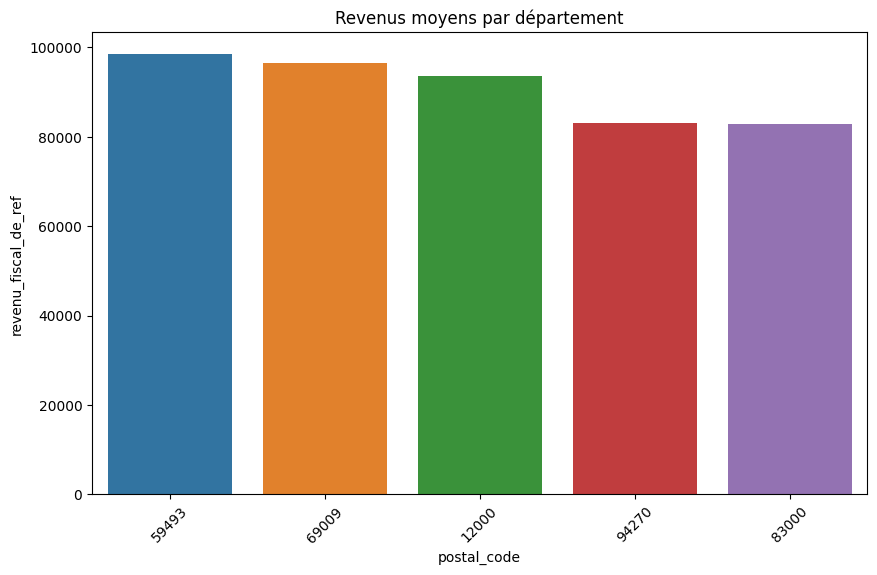

In [38]:
# Revenus moyens par département
revenus_par_zone = taxes.groupby(['postal_code','revenu_fiscal_de_ref']).agg('mean').reset_index().sort_values(by='revenu_fiscal_de_ref', ascending=False)

# Le top 5 des départements avec le plus grand revenu moyen
plt.figure(figsize=(10,6))
sns.barplot(x=revenus_par_zone['postal_code'].head(5),y=revenus_par_zone['revenu_fiscal_de_ref'].head(5))
plt.xticks(rotation=45)
plt.title("Revenus moyens par département")
plt.show()

### Les parts fiscales

In [50]:
# La proportion de déclarants avec 1 seule part fiscale
one_part = taxes[taxes.nb_parts == 1]
prop = len(one_part)/len(taxes) 
print("La proportion est : {}%".format(prop))

La proportion est : 0.0%
